<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Grupos_de_Edad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a leer y cargar los siguientes archivos:

1. SEXO_GRUPO_EDAD -> tiene homicidios totales y separa por grupos de edad y sexo

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np

from google.colab import files 
import io

In [53]:
upload = files.upload()

Saving SEXO_GRUPO_EDAD.xlsm to SEXO_GRUPO_EDAD (2).xlsm


In [54]:
df_Grupos=pd.read_excel(io.BytesIO(upload["SEXO_GRUPO_EDAD.xlsm"]), header=0)#df con los datos de la población
df_Grupos

,AÑO,ENTIDAD,GRUPO_EDAD,HOMBRES,MUJERES,TOTAL
0,2000,Total,Total,9442,1284,10737
1,2000,Total,0-9 años,174,103,280
2,2000,Total,10-19 años,985,185,1170
3,2000,Total,20-29 años,2845,286,3131
4,2000,Total,30-39 años,2279,243,2523
...,...,...,...,...,...,...
215,2021,Total,40-49 años,5445,596,6046
216,2021,Total,50-59 años,2518,268,2787
217,2021,Total,60-69 años,979,136,1115
218,2021,Total,70 y más años,445,110,557


In [ ]:
df_Grupos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AÑO         220 non-null    int64 
 1   ENTIDAD     220 non-null    object
 2   GRUPO_EDAD  220 non-null    object
 3   HOMBRES     220 non-null    int64 
 4   MUJERES     220 non-null    int64 
 5   TOTAL       220 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.4+ KB


##% DE HOMICIDIOS POR GRUPO DE EDAD Y SEXO

In [ ]:
df_Grupos["ENTIDAD"][0]

'Total'

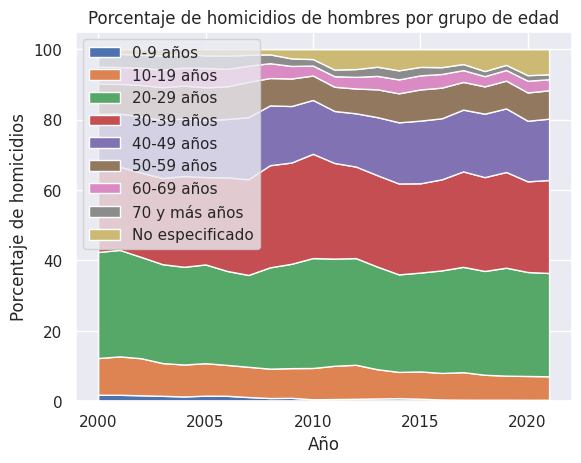

In [55]:
# Filtramos los datos para quedarnos con los homicidios de hombres por grupo de edad
df_Hombres = df_Grupos[df_Grupos['GRUPO_EDAD'] != 'Total']
df_Hombres = df_Hombres[['AÑO', 'GRUPO_EDAD', 'HOMBRES']]

# Calculamos el porcentaje de homicidios de hombres por grupo de edad
df_Hombres['PORCENTAJE'] = 100 * df_Hombres['HOMBRES'] / df_Hombres.groupby('AÑO')['HOMBRES'].transform('sum')

# Creamos la gráfica stackplot
plt.stackplot(df_Hombres['AÑO'].unique(), [df_Hombres[df_Hombres['GRUPO_EDAD']==grupo]['PORCENTAJE'] for grupo in df_Hombres['GRUPO_EDAD'].unique()], labels=df_Hombres['GRUPO_EDAD'].unique())
plt.legend(loc='upper left')
plt.xlabel('Año')
plt.ylabel('Porcentaje de homicidios')
plt.title('Porcentaje de homicidios de hombres por grupo de edad')
plt.show()


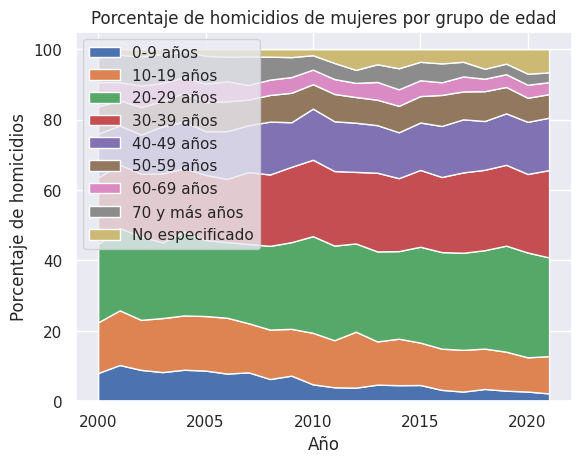

In [56]:
# Filtramos los datos para quedarnos con los homicidios de hombres por grupo de edad
df_Mujeres = df_Grupos[df_Grupos['GRUPO_EDAD'] != 'Total']
df_Mujeres = df_Mujeres[['AÑO', 'GRUPO_EDAD', 'MUJERES']]

# Calculamos el porcentaje de homicidios de hombres por grupo de edad
df_Mujeres['PORCENTAJE'] = 100 * df_Mujeres['MUJERES'] / df_Mujeres.groupby('AÑO')['MUJERES'].transform('sum')

# Creamos la gráfica stackplot
plt.stackplot(df_Mujeres['AÑO'].unique(), [df_Mujeres[df_Mujeres['GRUPO_EDAD']==grupo]['PORCENTAJE'] for grupo in df_Mujeres['GRUPO_EDAD'].unique()], labels=df_Mujeres['GRUPO_EDAD'].unique())
plt.legend(loc='upper left')
plt.xlabel('Año')
plt.ylabel('Porcentaje de homicidios')
plt.title('Porcentaje de homicidios de mujeres por grupo de edad')
plt.show()

##Tasas de homicidios por grupo a la edad

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

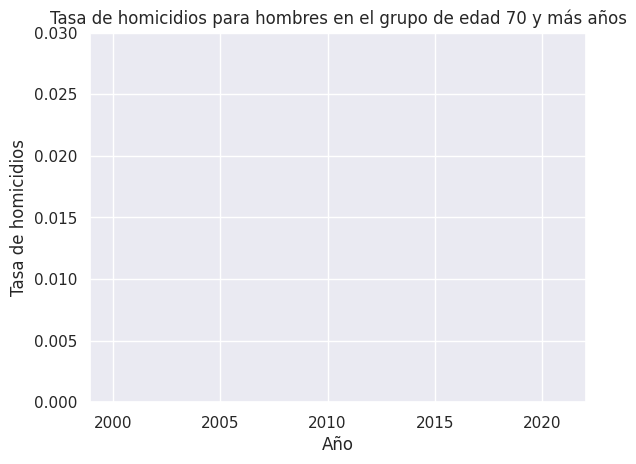

In [ ]:
df_hombres = df_Grupos[(df_Grupos['ENTIDAD'] == 'Total') & (df_Grupos['GRUPO_EDAD'] != 'Total') & (df_Grupos['GRUPO_EDAD'] != 'No especificado')]

# Obtener la población masculina por grupo de edad
poblacion_hombres = df_Grupos[(df_Grupos['ENTIDAD'] == 'Total') & (df_Grupos['GRUPO_EDAD'] != 'Total') & (df_Grupos['GRUPO_EDAD'] != 'No especificado')]['HOMBRES'].tolist()

# Crear una lista de figuras, una para cada grupo de edad
figuras = []
for grupo_edad in df_hombres['GRUPO_EDAD'].unique():
    figuras.append(plt.figure())

# Dibujar cada figura con la tasa de homicidios para ese grupo de edad
for i, figura in enumerate(figuras):
    grupo_edad = df_hombres['GRUPO_EDAD'].unique()[i]
    tasa_homicidios = df_hombres[df_hombres['GRUPO_EDAD'] == grupo_edad]['HOMBRES'] / poblacion_hombres[i]
    plt.plot(df_hombres[df_hombres['GRUPO_EDAD'] == grupo_edad]['AÑO'], tasa_homicidios)
    plt.title(f'Tasa de homicidios para hombres en el grupo de edad {grupo_edad}')
    plt.xlabel('Año')
    plt.ylabel('Tasa de homicidios')
    plt.ylim([0, 0.03])  # Ajustar límites del eje y para una mejor visualización
    
# Mostrar todas las figuras
plt.show()

In [57]:
# crear un dataframe que contenga los datos de hombres en cada grupo de edad
df_hombres = df_Grupos[(df_Grupos["ENTIDAD"] == "Total") & (df_Grupos["GRUPO_EDAD"] != "Total") & (df_Grupos["GRUPO_EDAD"] != "No especificado") & (df_Grupos["MUJERES"] == 0)]

# crear una lista de los grupos de edad
grupos_edad = df_hombres["GRUPO_EDAD"].unique()

# crear una figura con una subfigura para cada grupo de edad
fig, axs = plt.subplots(len(grupos_edad), 1, figsize=(10, 20), sharex=True)

# iterar sobre los grupos de edad
for i, grupo_edad in enumerate(grupos_edad):

    # crear un dataframe que contenga los datos para el grupo de edad actual
    df_grupo_edad = df_hombres[df_hombres["GRUPO_EDAD"] == grupo_edad]

    # calcular la tasa de homicidios para cada año
    tasas = df_grupo_edad["HOMBRES"] / df_Grupos[df_Grupos["AÑO"] == df_grupo_edad["AÑO"].max()]["HOMBRES"].sum()

    # trazar la gráfica de línea
    axs[i].plot(df_grupo_edad["AÑO"], tasas)
    axs[i].set_title(grupo_edad)

# establecer las etiquetas del eje x y el título
plt.xlabel("Año")
plt.suptitle("Tasa de homicidios de hombres por grupo de edad")
plt.show()

ValueError: ignored

<Figure size 1000x2000 with 0 Axes>

<ipython-input-58-71373fe49fea>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_edad = df_edad.groupby("GRUPO_EDAD").sum()["HOMBRES"]


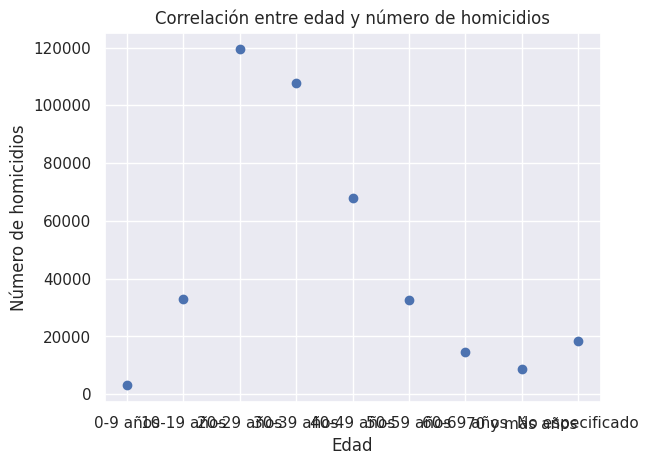

In [58]:
#Esto es a nivel nacional

# Filtro para tomar solo los datos de cada grupo de edad en cada año
df_edad = df_Grupos[(df_Grupos["ENTIDAD"] == "Total") & (df_Grupos["GRUPO_EDAD"] != "Total")]

# Agrupamos por grupo de edad y sumamos el número de homicidios
df_edad = df_edad.groupby("GRUPO_EDAD").sum()["HOMBRES"]

# Hacemos la gráfica de dispersión
plt.scatter(df_edad.index, df_edad.values)

# Añadimos los títulos y etiquetas de los ejes
plt.title("Correlación entre edad y número de homicidios")
plt.xlabel("Edad")
plt.ylabel("Número de homicidios")

# Mostramos la gráfica
plt.show()